In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

#read in the data
df = pd.read_csv('data.csv')

In [3]:
df.head()

,subject_id,insurance,religion,marital_status,ethnicity,diagnosis,gender,age,education,income,employment_status,employment_history,food_stamps,housing_status
0,10006,Medicare,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,F,71.484932,Less than high school,"15,000-20,000",Employed,6-10 years,No,Rent
1,10011,Private,CATHOLIC,SINGLE,MINORITY,HEPATITIS B,F,36.252055,Some college,"30,000-35,000",Self-employed/No data,6-10 years,No,Own
2,10013,Medicare,CATHOLIC,SINGLE,MINORITY,SEPSIS,F,87.150685,College graduate,"25,000-30,000",Employed,11-15 years,No,Own
3,10017,Medicare,CATHOLIC,DIVORCED,WHITE,HUMERAL FRACTURE,F,77.027397,Some graduate school,"15,000-20,000",Employed,1-5 years,No,Rent
4,10019,Medicare,CATHOLIC,DIVORCED,WHITE,ALCOHOLIC HEPATITIS,M,48.934247,Less than high school,"15,000-20,000",Employed,6-10 years,No,Other


In [12]:
## data preparation
#drop the first column
df = df.drop(df.columns[0], axis=1)

df.head()



,insurance,religion,marital_status,ethnicity,diagnosis,gender,age,education,income,employment_status,employment_history,food_stamps,housing_status
0,Medicare,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,F,71.484932,Less than high school,"15,000-20,000",Employed,6-10 years,No,Rent
1,Private,CATHOLIC,SINGLE,MINORITY,HEPATITIS B,F,36.252055,Some college,"30,000-35,000",Self-employed/No data,6-10 years,No,Own
2,Medicare,CATHOLIC,SINGLE,MINORITY,SEPSIS,F,87.150685,College graduate,"25,000-30,000",Employed,11-15 years,No,Own
3,Medicare,CATHOLIC,DIVORCED,WHITE,HUMERAL FRACTURE,F,77.027397,Some graduate school,"15,000-20,000",Employed,1-5 years,No,Rent
4,Medicare,CATHOLIC,DIVORCED,WHITE,ALCOHOLIC HEPATITIS,M,48.934247,Less than high school,"15,000-20,000",Employed,6-10 years,No,Other


In [19]:
##create a column for the outcome variable with 1 for social worker intervention and 0 for no intervention random data

df['social_worker_intervention'] = np.random.randint(2, size=len(df))

categorical = ['insurance', 'marital_status', 'religion','gender','education','employment_status','food_stamps','housing_status']
numerical = ['age','income']






In [20]:
df.head()

##create dummy variables for the categorical variables
df = pd.get_dummies(df, columns=categorical, drop_first=True)

##for income, get the upper bound of the income range if the range is given
if df['income'].str.contains('-').any():
    df['income'] = df['income'].str.split('-').str[1]
else :
    df['income'] = 10000




In [22]:
##for employment histtory, get upper bound of the range if the range is given
if df['employment_history'].str.contains('-').any():
    df['employment_history'] = df['employment_history'].str.split('-').str[1]

df.head()

,ethnicity,diagnosis,age,income,employment_history,social_worker_intervention,insurance_Medicaid,insurance_Medicare,insurance_Private,marital_status_MARRIED,...,gender_M,education_Graduate degree,education_High school,education_Less than high school,education_Some college,education_Some graduate school,employment_status_Self-employed/No data,food_stamps_Yes,housing_status_Own,housing_status_Rent
0,BLACK/AFRICAN AMERICAN,SEPSIS,71.484932,"20,000",10 years,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,MINORITY,HEPATITIS B,36.252055,"35,000",10 years,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
2,MINORITY,SEPSIS,87.150685,"30,000",15 years,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,WHITE,HUMERAL FRACTURE,77.027397,"20,000",5 years,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,WHITE,ALCOHOLIC HEPATITIS,48.934247,"20,000",10 years,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [31]:
##get dummies for ethnicity
df = pd.get_dummies(df,columns=['ethnicity'],drop_first=True)

In [41]:
##for employment history, remove the word 'years' and convert to numeric
df['employment_history'] = df['employment_history'].str.replace('years','')
df['employment_history'] = pd.to_numeric(df['employment_history'])

df.head()

AttributeError: Can only use .str accessor with string values!

In [37]:
df.head()
x = df.drop(['social_worker_intervention'], axis=1)
y = df['social_worker_intervention']

x

,diagnosis,age,income,employment_history,insurance_Medicaid,insurance_Medicare,insurance_Private,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,...,housing_status_Own,housing_status_Rent,ethnicity_ASIAN,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_MINORITY,ethnicity_OTHER,ethnicity_UNABLE TO OBTAIN,ethnicity_WHITE
0,SEPSIS,71.484932,"20,000",10,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,HEPATITIS B,36.252055,"35,000",10,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,SEPSIS,87.150685,"30,000",15,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,HUMERAL FRACTURE,77.027397,"20,000",5,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,ALCOHOLIC HEPATITIS,48.934247,"20,000",10,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,PERICARDIAL EFFUSION,56.301370,"30,000",15,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
125,ALTERED MENTAL STATUS,300.202740,"20,000",5,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
126,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,45.649315,NaN,15,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
127,BRADYCARDIA,75.153425,"15,000",15,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [48]:
##remove the commas from the income column
df['income'] = df['income'].str.replace(',','')
df.head()

,age,income,employment_history,social_worker_intervention,insurance_Medicaid,insurance_Medicare,insurance_Private,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,...,housing_status_Own,housing_status_Rent,ethnicity_ASIAN,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC OR LATINO,ethnicity_HISPANIC/LATINO - PUERTO RICAN,ethnicity_MINORITY,ethnicity_OTHER,ethnicity_UNABLE TO OBTAIN,ethnicity_WHITE
0,71.484932,20000,10,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,36.252055,35000,10,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,87.150685,30000,15,0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,77.027397,20000,5,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,48.934247,20000,10,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
x = df.drop(['social_worker_intervention'], axis=1)
y = df['social_worker_intervention']

In [64]:
##split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [60]:
##count of nan values in each column
df.isnull().sum()

##fill the nan values of income with the 10000
df['income'] = df['income'].fillna(10000)







<AxesSubplot:>

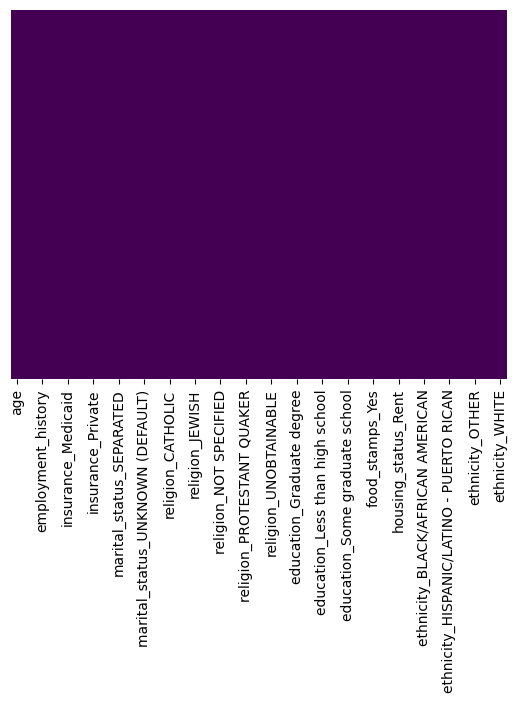

In [61]:
sns.heatmap(pd.isnull(df),yticklabels=False,cbar=False,cmap='viridis')

In [72]:
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg,step=15)
rfe = rfe.fit(X_train, y_train)

In [73]:
rfe.support_

array([False, False, False,  True,  True, False,  True, False,  True,
       False,  True,  True,  True, False, False,  True, False,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True, False,  True, False,
       False,  True])

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 3),
 ('income', False, 3),
 ('employment_history', False, 3),
 ('insurance_Medicaid', True, 1),
 ('insurance_Medicare', True, 1),
 ('insurance_Private', False, 2),
 ('marital_status_MARRIED', True, 1),
 ('marital_status_SEPARATED', False, 3),
 ('marital_status_SINGLE', True, 1),
 ('marital_status_UNKNOWN (DEFAULT)', False, 3),
 ('marital_status_WIDOWED', True, 1),
 ('religion_CATHOLIC', True, 1),
 ('religion_CHRISTIAN SCIENTIST', True, 1),
 ('religion_JEWISH', False, 3),
 ('religion_MUSLIM', False, 3),
 ('religion_NOT SPECIFIED', True, 1),
 ('religion_OTHER', False, 3),
 ('religion_PROTESTANT QUAKER', True, 1),
 ('religion_ROMANIAN EAST. ORTH', False, 3),
 ('religion_UNOBTAINABLE', True, 1),
 ('gender_M', False, 3),
 ('education_Graduate degree', True, 1),
 ('education_High school', False, 2),
 ('education_Less than high school', True, 1),
 ('education_Some college', True, 1),
 ('education_Some graduate school', True, 1),
 ('employment_status_Self-employed/No data', Tru

In [76]:
col = X_train.columns[rfe.support_]
col

Index(['insurance_Medicaid', 'insurance_Medicare', 'marital_status_MARRIED',
       'marital_status_SINGLE', 'marital_status_WIDOWED', 'religion_CATHOLIC',
       'religion_CHRISTIAN SCIENTIST', 'religion_NOT SPECIFIED',
       'religion_PROTESTANT QUAKER', 'religion_UNOBTAINABLE',
       'education_Graduate degree', 'education_Less than high school',
       'education_Some college', 'education_Some graduate school',
       'employment_status_Self-employed/No data', 'food_stamps_Yes',
       'ethnicity_HISPANIC OR LATINO', 'ethnicity_MINORITY',
       'ethnicity_WHITE'],
      dtype='object')

In [77]:
X_train.columns[~rfe.support_]

Index(['age', 'income', 'employment_history', 'insurance_Private',
       'marital_status_SEPARATED', 'marital_status_UNKNOWN (DEFAULT)',
       'religion_JEWISH', 'religion_MUSLIM', 'religion_OTHER',
       'religion_ROMANIAN EAST. ORTH', 'gender_M', 'education_High school',
       'housing_status_Own', 'housing_status_Rent', 'ethnicity_ASIAN',
       'ethnicity_BLACK/AFRICAN AMERICAN',
       'ethnicity_HISPANIC/LATINO - PUERTO RICAN', 'ethnicity_OTHER',
       'ethnicity_UNABLE TO OBTAIN'],
      dtype='object')

In [78]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Generalized Linear Model Regression Results                      
======================================================================================
Dep. Variable:     social_worker_intervention   No. Observations:                  103
Model:                                    GLM   Df Residuals:                       84
Model Family:                        Binomial   Df Model:                           18
Link Function:                          Logit   Scale:                          1.0000
Method:                                  IRLS   Log-Likelihood:                -57.379
Date:                        Sat, 12 Nov 2022   Deviance:                       114.76
Time:                                13:09:23   Pearson chi2:                     94.2
No. Iterations:                            20   Pseudo R-squ. (CS):             0.2347
Covariance Type:                    nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.6431      0.957     -0.672      0.502      -2.519       1.233
insurance_Medicaid                          0.2692      1.401      0.192      0.848      -2.477       3.016
insurance_Medicare                         -0.8776      0.493     -1.779      0.075      -1.845       0.089
marital_status_MARRIED                      1.0210      0.978      1.044      0.296      -0.895       2.937
marital_status_SINGLE                       0.4747      1.114      0.426      0.670      -1.710       2.659
marital_status_WIDOWED                     -0.1405      0.990     -0.142      0.887      -2.081       1.800
religion_CATHOLIC                           0.0224      0.787      0.029      0.977      -1.520       1.565
religion_CHRISTIAN SCIENTIST              -22.7530   4.34e+04     -0.001      1.000   -8.51e+04    8.51e+04
religion_NOT SPECIFIED                      0.5813      1.021      0.569      0.569      -1.420       2.582
religion_PROTESTANT QUAKER                  0.9241      1.199      0.771      0.441      -1.425       3.273
religion_UNOBTAINABLE                       1.9619      0.997      1.968      0.049       0.008       3.916
education_Graduate degree                  -0.8224      0.731     -1.126      0.260      -2.254       0.609
education_Less than high school            -0.4745      0.673     -0.705      0.481      -1.794       0.845
education_Some college                      0.2409      0.722      0.334      0.738      -1.173       1.655
education_Some graduate school             -0.1311      0.825     -0.159      0.874      -1.748       1.485
employment_status_Self-employed/No data     0.2345      0.701      0.334      0.738      -1.140       1.609
food_stamps_Yes                            -0.0458      0.752     -0.061      0.951      -1.521       1.429
ethnicity_HISPANIC OR LATINO               21.7610   1.67e+04      0.001      0.999   -3.28e+04    3.28e+04
ethnicity_MINORITY                         -0.6239      1.036     -0.602      0.547      -2.654       1.406
ethnicity_WHITE                             0.9128      0.563      1.622      0.105      -0.190       2.016
===========================================================================================================
"""

In [81]:
col1 = col.drop('religion_CHRISTIAN SCIENTIST',1)
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

In [82]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Generalized Linear Model Regression Results                      
======================================================================================
Dep. Variable:     social_worker_intervention   No. Observations:                  103
Model:                                    GLM   Df Residuals:                       85
Model Family:                        Binomial   Df Model:                           17
Link Function:                          Logit   Scale:                          1.0000
Method:                                  IRLS   Log-Likelihood:                -58.302
Date:                        Sat, 12 Nov 2022   Deviance:                       116.60
Time:                                13:13:11   Pearson chi2:                     96.0
No. Iterations:                            24   Pseudo R-squ. (CS):             0.2209
Covariance Type:                    nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9445      0.887     -1.065      0.287      -2.682       0.793
insurance_Medicaid                          0.4416      1.409      0.313      0.754      -2.320       3.203
insurance_Medicare                         -1.0281      0.465     -2.209      0.027      -1.940      -0.116
marital_status_MARRIED                      1.1348      0.926      1.225      0.221      -0.681       2.951
marital_status_SINGLE                       0.5852      1.074      0.545      0.586      -1.519       2.690
marital_status_WIDOWED                      0.0366      0.956      0.038      0.969      -1.838       1.911
religion_CATHOLIC                           0.3516      0.747      0.470      0.638      -1.113       1.816
religion_NOT SPECIFIED                      0.9152      0.988      0.927      0.354      -1.021       2.851
religion_PROTESTANT QUAKER                  1.2797      1.170      1.094      0.274      -1.013       3.572
religion_UNOBTAINABLE                       2.2719      0.972      2.337      0.019       0.367       4.177
education_Graduate degree                  -0.7366      0.720     -1.022      0.307      -2.149       0.675
education_Less than high school            -0.4787      0.649     -0.737      0.461      -1.752       0.794
education_Some college                      0.2948      0.717      0.411      0.681      -1.110       1.699
education_Some graduate school             -0.0491      0.826     -0.059      0.953      -1.669       1.570
employment_status_Self-employed/No data     0.0836      0.672      0.124      0.901      -1.234       1.401
food_stamps_Yes                            -0.0343      0.762     -0.045      0.964      -1.528       1.459
ethnicity_HISPANIC OR LATINO               26.0018   1.45e+05      0.000      1.000   -2.84e+05    2.84e+05
ethnicity_MINORITY                         -0.6390      1.041     -0.614      0.540      -2.680       1.402
ethnicity_WHITE                             0.8787      0.564      1.559      0.119      -0.226       1.984
===========================================================================================================
"""

In [83]:
col2 = col1.drop('ethnicity_HISPANIC OR LATINO',1)
X_train_sm = sm.add_constant(X_train[col2])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()

In [113]:
X_train_sm.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')


In [84]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Generalized Linear Model Regression Results                      
======================================================================================
Dep. Variable:     social_worker_intervention   No. Observations:                  103
Model:                                    GLM   Df Residuals:                       86
Model Family:                        Binomial   Df Model:                           16
Link Function:                          Logit   Scale:                          1.0000
Method:                                  IRLS   Log-Likelihood:                -59.484
Date:                        Sat, 12 Nov 2022   Deviance:                       118.97
Time:                                13:14:32   Pearson chi2:                     98.5
No. Iterations:                             5   Pseudo R-squ. (CS):             0.2028
Covariance Type:                    nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9317      0.880     -1.059      0.290      -2.657       0.793
insurance_Medicaid                          0.4990      1.428      0.349      0.727      -2.300       3.298
insurance_Medicare                         -0.8992      0.452     -1.991      0.046      -1.784      -0.014
marital_status_MARRIED                      1.0699      0.909      1.178      0.239      -0.711       2.851
marital_status_SINGLE                       0.8180      1.049      0.780      0.436      -1.238       2.874
marital_status_WIDOWED                     -0.0854      0.938     -0.091      0.927      -1.923       1.753
religion_CATHOLIC                           0.3284      0.747      0.440      0.660      -1.135       1.792
religion_NOT SPECIFIED                      1.2681      0.962      1.318      0.188      -0.618       3.154
religion_PROTESTANT QUAKER                  1.1823      1.162      1.017      0.309      -1.095       3.460
religion_UNOBTAINABLE                       2.2201      0.962      2.308      0.021       0.335       4.105
education_Graduate degree                  -0.7078      0.719     -0.985      0.325      -2.116       0.701
education_Less than high school            -0.3894      0.642     -0.606      0.544      -1.648       0.869
education_Some college                      0.2767      0.718      0.385      0.700      -1.131       1.684
education_Some graduate school              0.4242      0.763      0.556      0.578      -1.071       1.919
employment_status_Self-employed/No data    -0.0325      0.662     -0.049      0.961      -1.331       1.266
food_stamps_Yes                             0.1689      0.720      0.235      0.814      -1.242       1.580
ethnicity_MINORITY                         -0.8219      1.034     -0.795      0.427      -2.848       1.204
ethnicity_WHITE                             0.6585      0.535      1.230      0.219      -0.391       1.708
===========================================================================================================
"""

In [85]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

120    0.869568
16     0.305326
89     0.393496
119    0.816596
13     0.413588
100    0.663605
101    0.698620
43     0.169680
15     0.283049
94     0.679047
dtype: float64

In [108]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [87]:
y_train_pred_final = pd.DataFrame({'social_worker_intervention':y_train.values, 'social_worker_intervention_Prob':y_train_pred})

In [89]:
y_train_pred_final['ID'] = y_train.index

y_train_pred_final.head()

,social_worker_intervention,social_worker_intervention_Prob,ID
0,1,0.869568,120
1,0,0.305326,16
2,1,0.393496,89
3,1,0.816596,119
4,0,0.413588,13


In [92]:
y_train_pred_final['predicted'] = y_train_pred_final.social_worker_intervention_Prob.map(lambda x: 1 if x > 0.5 else 0)



In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,insurance_Medicare,23.78
14,food_stamps_Yes,10.83
2,marital_status_MARRIED,3.95
3,marital_status_SINGLE,3.66
5,religion_CATHOLIC,3.17
4,marital_status_WIDOWED,2.65
7,religion_PROTESTANT QUAKER,2.62
9,education_Graduate degree,2.47
8,religion_UNOBTAINABLE,1.80
16,ethnicity_WHITE,1.75


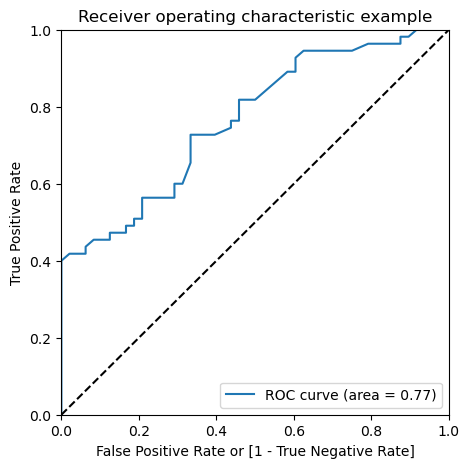

In [96]:
## draw the ROC curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate = False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

fpr, tpr, thresholds = roc_curve(y_train_pred_final.social_worker_intervention, y_train_pred_final.social_worker_intervention_Prob, drop_intermediate = False)
draw_roc(y_train_pred_final.social_worker_intervention, y_train_pred_final.social_worker_intervention_Prob)


In [98]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.social_worker_intervention_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,social_worker_intervention,social_worker_intervention_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.869568,120,1,1,1,1,1,1,1,1,1,1,0
1,0,0.305326,16,0,1,1,1,1,0,0,0,0,0,0
2,1,0.393496,89,0,1,1,1,1,0,0,0,0,0,0
3,1,0.816596,119,1,1,1,1,1,1,1,1,1,1,0
4,0,0.413588,13,0,1,1,1,1,1,0,0,0,0,0


In [100]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.predicted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.524272  1.000000  0.000000
0.1   0.1  0.533981  1.000000  0.020408
0.2   0.2  0.601942  1.000000  0.163265
0.3   0.3  0.708738  1.000000  0.387755
0.4   0.4  0.873786  1.000000  0.734694
0.5   0.5  1.000000  1.000000  1.000000
0.6   0.6  0.912621  0.833333  1.000000
0.7   0.7  0.786408  0.592593  1.000000
0.8   0.8  0.611650  0.259259  1.000000
0.9   0.9  0.495146  0.037037  1.000000


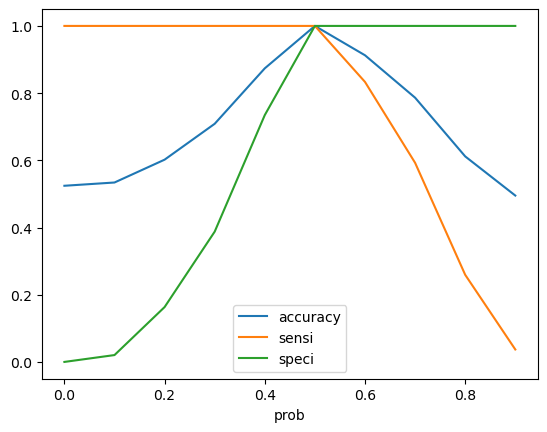

In [101]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [102]:
y_train_pred_final['final_predicted'] = y_train_pred_final.social_worker_intervention_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,social_worker_intervention,social_worker_intervention_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.869568,120,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.305326,16,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.393496,89,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.816596,119,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.413588,13,0,1,1,1,1,1,0,0,0,0,0,0


In [104]:
y_train_pred_final['TSS'] = y_train_pred_final.social_worker_intervention_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,social_worker_intervention,social_worker_intervention_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,TSS
0,1,0.869568,120,1,1,1,1,1,1,1,1,1,1,0,1,87
1,0,0.305326,16,0,1,1,1,1,0,0,0,0,0,0,0,31
2,1,0.393496,89,0,1,1,1,1,0,0,0,0,0,0,0,39
3,1,0.816596,119,1,1,1,1,1,1,1,1,1,1,0,1,82
4,0,0.413588,13,0,1,1,1,1,1,0,0,0,0,0,0,41


In [112]:
##save the log4m model
import pickle
filename = 'log4m'
pickle.dump(res, open(filename, 'wb'))

##load the log4m model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_train_sm)
print(result)


120    0.869568
16     0.305326
89     0.393496
119    0.816596
13     0.413588
         ...   
123    0.698620
67     0.584176
64     0.779875
117    0.603792
47     0.263270
Length: 103, dtype: float64


In [110]:
X_train_sm

,const,insurance_Medicaid,insurance_Medicare,marital_status_MARRIED,marital_status_SINGLE,marital_status_WIDOWED,religion_CATHOLIC,religion_NOT SPECIFIED,religion_PROTESTANT QUAKER,religion_UNOBTAINABLE,education_Graduate degree,education_Less than high school,education_Some college,education_Some graduate school,employment_status_Self-employed/No data,food_stamps_Yes,ethnicity_MINORITY,ethnicity_WHITE
120,1.0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1
16,1.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
89,1.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
119,1.0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1
13,1.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1.0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
67,1.0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
64,1.0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1
117,1.0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [106]:
##generate scores for each individual feature
from sklearn.feature_selection import f_classif
f_classif(X_train[col2], y_train)

p_values = f_classif(X_train[col2], y_train)[1]
p_values


array([0.3819642 , 0.01985002, 0.76465344, 0.20097171, 0.2790334 ,
       0.06429809, 0.09581689, 0.32668984, 0.12232561, 0.26481196,
       0.07210133, 0.38460493, 0.3317546 , 0.01984999, 0.5835699 ,
       0.3528167 , 0.18128891], dtype=float32)